<a href="https://colab.research.google.com/github/Tasfia-007/Ai-for-math-Data-mining-project-/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!tar -xvzf /content/amps.tar.gz -C /content/


Streaming output truncated to the last 5000 lines.
amps/mathematica/counting_and_statistics/mean/18604.txt
amps/mathematica/counting_and_statistics/mean/5070.txt
amps/mathematica/counting_and_statistics/mean/17537.txt
amps/mathematica/counting_and_statistics/mean/47300.txt
amps/mathematica/counting_and_statistics/mean/16629.txt
amps/mathematica/counting_and_statistics/mean/48033.txt
amps/mathematica/counting_and_statistics/mean/21085.txt
amps/mathematica/counting_and_statistics/mean/11146.txt
amps/mathematica/counting_and_statistics/mean/3401.txt
amps/mathematica/counting_and_statistics/mean/31296.txt
amps/mathematica/counting_and_statistics/mean/41765.txt
amps/mathematica/counting_and_statistics/mean/39806.txt
amps/mathematica/counting_and_statistics/mean/5064.txt
amps/mathematica/counting_and_statistics/mean/18610.txt
amps/mathematica/counting_and_statistics/mean/26926.txt
amps/mathematica/counting_and_statistics/mean/17523.txt
amps/mathematica/counting_and_statistics/mean/49339.txt


In [3]:
import shutil

folder_path = "/content/amps/khan"

# পুরো ফোল্ডার ডিলিট
shutil.rmtree(folder_path)

print(f"{folder_path} has been deleted.")


/content/amps/khan has been deleted.


In [ ]:
import os

def print_directory_structure_ignore_txt_json(root_dir, indent=""):
    try:
        items = sorted(os.listdir(root_dir))
    except Exception as e:
        print(f"{indent}⚠️ Error accessing {root_dir}: {e}")
        return

    # ফোল্ডারটা দেখাবো, এমনকি ভেতরে শুধু .txt/.json থাকলেও
    show_dir = False
    for item in items:
        path = os.path.join(root_dir, item)
        if os.path.isdir(path):
            show_dir = True
            break
        elif not (item.endswith(".txt") or item.endswith(".json")):
            show_dir = True
            break

    if not show_dir:
        return  # পুরো ফোল্ডারে শুধু .txt/.json থাকলে স্কিপ করবো

    print(f"{indent}📁 {os.path.basename(root_dir)}/")

    for item in items:
        path = os.path.join(root_dir, item)
        if os.path.isfile(path):
            if item.endswith(".txt") or item.endswith(".json"):
                continue
            print(f"{indent}    📄 {item}")
        elif os.path.isdir(path):
            print_directory_structure_ignore_txt_json(path, indent + "    ")

# কল করো
print_directory_structure_ignore_txt_json("/content/amps")


📁 amps/
    📁 khan/
    📁 mathematica/
        📄 .make_flists.py.swp
        📁 algebra/
            📄 arithmetic_series.nb
            📄 complete_square.nb
            📄 complete_square_w_steps.nb
            📄 complex_arithmetic.nb
            📄 complex_norm_and_arg.nb
            📄 complex_raised_to_exponent.nb
            📄 conic_sections.nb
            📄 exponential_equations.nb
            📄 factor_polynomials.nb
            📄 factor_polynomials_w_steps.nb
            📄 find_roots.nb
            📄 function_domain.nb
            📄 function_evaluation.nb
            📄 function_range.nb
            📄 geometric_series.nb
            📄 invert_function.nb
            📄 log_equations.nb
            📄 multiply_polynomials.nb
            📄 multiply_polynomials_w_steps.nb
            📄 parametric_equations.nb
            📄 pemdas.nb
            📄 polynomial_arithmetic.nb
            📄 polynomial_division_equation.nb
            📄 polynomial_gcd.nb
            📄 polynomial_quotient.nb
      

In [6]:
import os, random, shutil

ROOT = "/content/amps/mathematica"

KEEP = 1000

for root, dirs, files in os.walk(ROOT):
    txt_files = [f for f in files if f.endswith(".txt")]
    if len(txt_files) > KEEP:

        keep_files = set(random.sample(txt_files, KEEP))
        for f in txt_files:
            if f not in keep_files:
                os.remove(os.path.join(root, f))


In [ ]:
import json

# /content/amps/khan/124/1607895295.json
with open("/content/amps/khan/124/1607895295.json", "r") as f:
    json_data = json.load(f)

print("🔹 Content of .json file:")
print("-" * 50)
print(json.dumps(json_data, indent=4))


🔹 Content of .json file:
--------------------------------------------------
{
    "problem": "The first five terms of an arithmetic sequence are given: $4,10,16,22,28, \\ldots$ What is the sixth term in the sequence?",
    "hints": [
        "In any arithmetic sequence, each term is equal to the previous term plus the common difference.",
        "Thus, the second term is equal to the first term plus the common difference. In this sequence, the second term,",
        "$10$",
        ", is",
        "$6$",
        "more than the first term,",
        "$4$",
        "Therefore, the common difference is",
        "$6$",
        "The sixth term in the sequence is equal to the fifth term plus the common difference, or $28 + 6 = 34$."
    ]
}


In [ ]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

data_root = "/content/amps"
topic_counts = defaultdict(lambda: {"txt": 0, "json": 0})

for root, dirs, files in os.walk(data_root):
    for file in files:
        ext = os.path.splitext(file)[-1]
        if ext in [".txt", ".json"]:
            # topic is assumed to be the 3rd part of the path, e.g., /amps/khan/algebra/...
            parts = root.split("/")
            if len(parts) >= 4:
                topic = parts[3]  # e.g., 'algebra', 'calculus', 'polynomial'
                topic_counts[topic][ext[1:]] += 1

# Show the collected counts
print("📊 Topic-wise Problem Counts:")
for topic, counts in topic_counts.items():
    print(f"{topic}: {counts['txt']} txt, {counts['json']} json")


📊 Topic-wise Problem Counts:
khan: 0 txt, 103059 json
mathematica: 4830500 txt, 0 json


In [7]:
import os
from collections import defaultdict

mathematica_root = "/content/amps/mathematica"
txt_counts = defaultdict(lambda: defaultdict(int))

# Traverse the folder structure
for root, dirs, files in os.walk(mathematica_root):
    rel_path = os.path.relpath(root, mathematica_root)
    parts = rel_path.split(os.sep)

    if len(parts) >= 2:
        main_topic = parts[0]
        sub_topic = parts[1]

        for file in files:
            if file.endswith(".txt"):
                txt_counts[main_topic][sub_topic] += 1

# Display the results
print("📊 .txt File Counts by Topic and Subtopic:\n")
for main_topic in sorted(txt_counts):
    print(f"📁 {main_topic}/")
    for sub_topic in sorted(txt_counts[main_topic]):
        count = txt_counts[main_topic][sub_topic]
        print(f"    📂 {sub_topic}/ — {count} files")


📊 .txt File Counts by Topic and Subtopic:

📁 algebra/
    📂 arithmetic_series/ — 1000 files
    📂 complete_square/ — 1000 files
    📂 complete_square_w_steps/ — 1000 files
    📂 complex_arithmetic/ — 1000 files
    📂 complex_norm_and_arg/ — 1000 files
    📂 complex_raised_to_exponent/ — 1000 files
    📂 conic_sections/ — 1000 files
    📂 exponential_equations/ — 1000 files
    📂 factor_polynomials/ — 1000 files
    📂 factor_polynomials_w_steps/ — 1000 files
    📂 find_roots/ — 1000 files
    📂 function_domain/ — 1000 files
    📂 function_evaluation/ — 1000 files
    📂 function_range/ — 1000 files
    📂 geometric_series/ — 1000 files
    📂 invert_function/ — 1000 files
    📂 log_equations/ — 1000 files
    📂 multiply_polynomials/ — 1000 files
    📂 multiply_polynomials_w_steps/ — 1000 files
    📂 parametric_equations/ — 1000 files
    📂 pemdas/ — 1000 files
    📂 polynomial_arithmetic/ — 1000 files
    📂 polynomial_division_equation/ — 1000 files
    📂 polynomial_gcd/ — 1000 files
    📂

In [ ]:
import pandas as pd

# Sample data: only a subset shown here for simplicity
data = [
    ("algebra", "arithmetic_series", 50000),
    ("algebra", "complete_square", 50000),
    ("algebra", "complete_square_w_steps", 5000),
    ("algebra", "factor_polynomials", 55000),
    ("calculus", "derivatives", 50000),
    ("calculus", "integrals", 10000),
    ("geometry", "polygons", 100000),
    ("geometry", "solids", 100000),
    ("geometry", "triangles", 100000),
    ("linear_algebra", "add", 50000),
    ("linear_algebra", "add_w_steps", 5000),
    ("number_theory", "gcd", 50000),
    ("number_theory", "gcd_w_steps", 5000),
    ("counting_and_statistics", "mean", 50000),
    ("counting_and_statistics", "mean_w_steps", 5000),
]

df = pd.DataFrame(data, columns=["Topic", "Subtopic", "Count"])


/tmp/ipython-input-3449894079.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


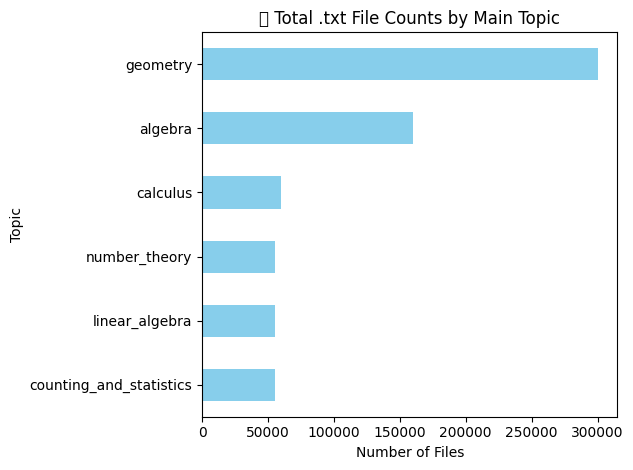

In [ ]:
import matplotlib.pyplot as plt

topic_counts = df.groupby("Topic")["Count"].sum().sort_values()

topic_counts.plot(kind="barh", color="skyblue")
plt.title("📊 Total .txt File Counts by Main Topic")
plt.xlabel("Number of Files")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1735161776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Topic", y="Count", palette="Set2")
/tmp/ipython-input-1735161776.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


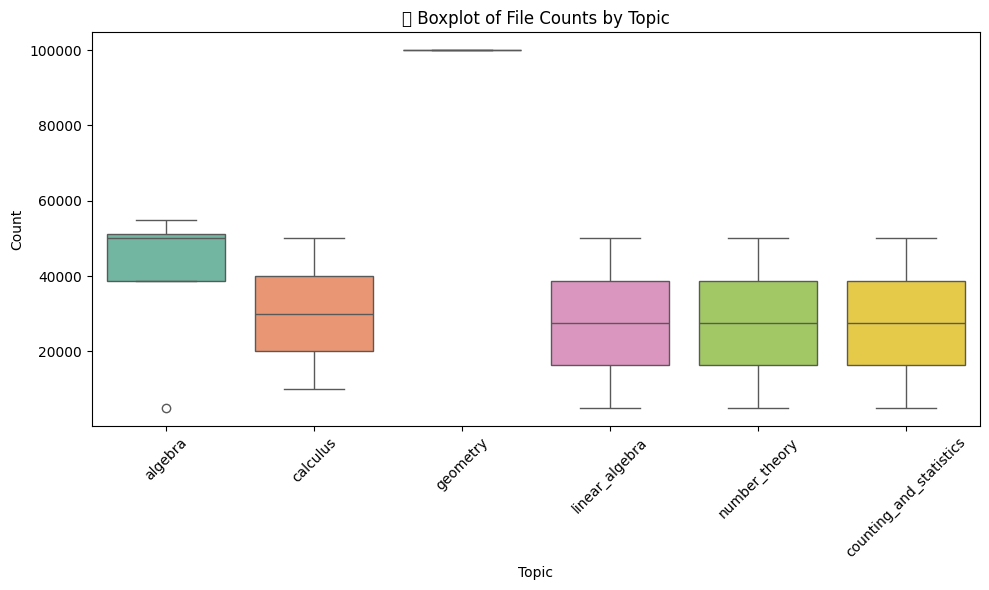

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Topic", y="Count", palette="Set2")
plt.title("📦 Boxplot of File Counts by Topic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3210189916.py:6: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


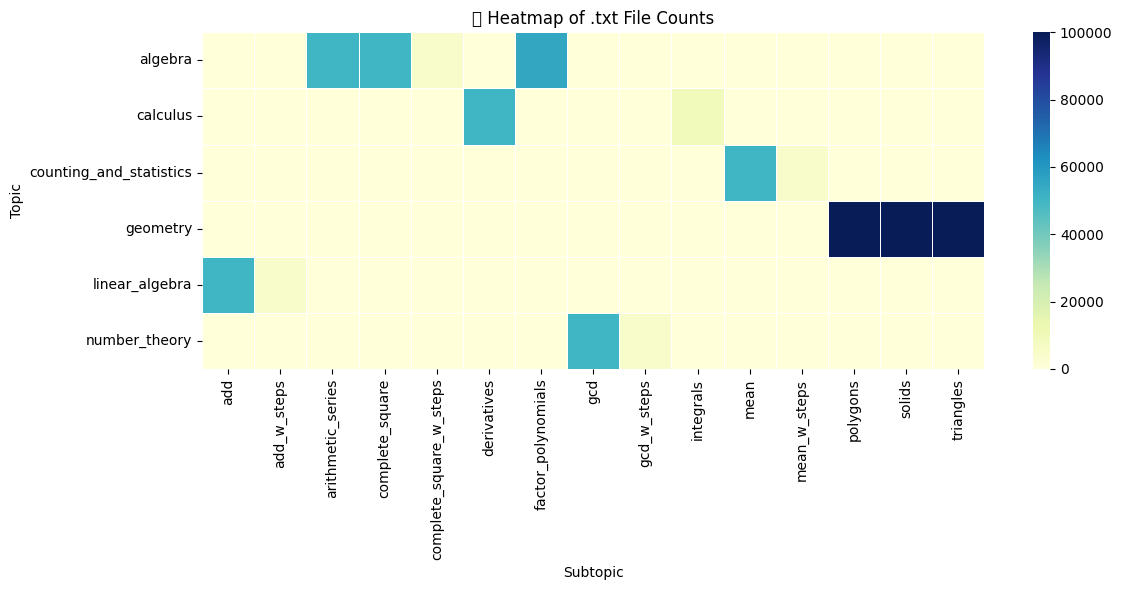

In [ ]:
pivot_df = df.pivot_table(index="Topic", columns="Subtopic", values="Count", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title("🌡 Heatmap of .txt File Counts")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


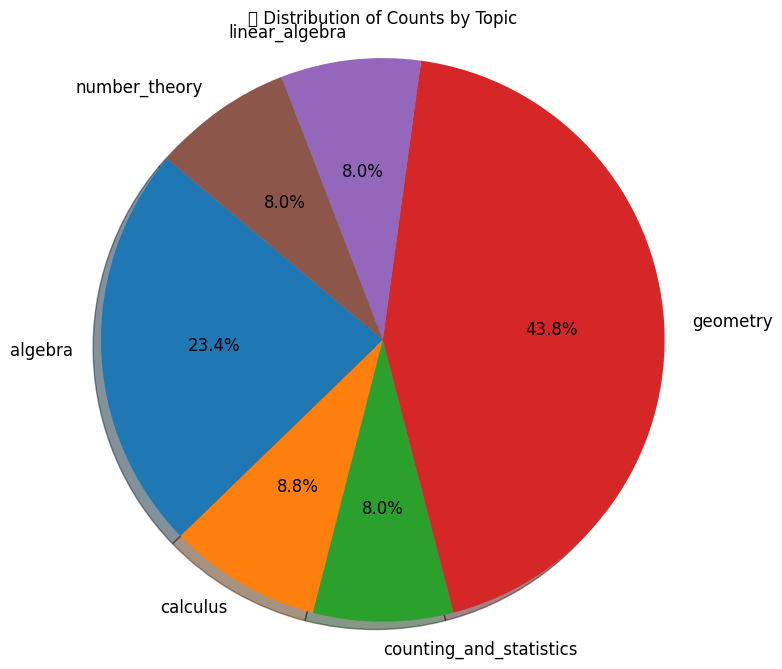

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data (already in df)
# Sum counts by topic
radar_data = df.groupby("Topic")["Count"].sum()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    radar_data,
    labels=radar_data.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    textprops={'fontsize': 12}
)
plt.title("📊 Distribution of Counts by Topic")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


/tmp/ipython-input-1986622132.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


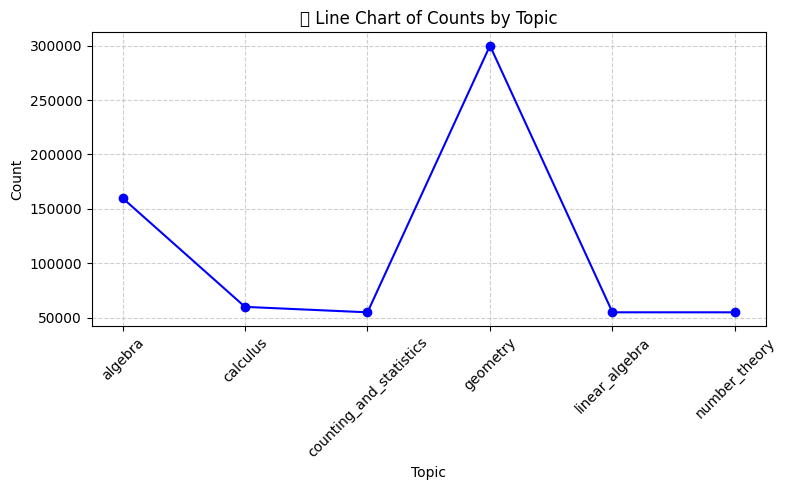

In [ ]:
import matplotlib.pyplot as plt

# Group counts by topic (already done)
radar_data = df.groupby("Topic")["Count"].sum()

# Prepare data for plotting
labels = radar_data.index.tolist()
values = radar_data.values.tolist()

plt.figure(figsize=(8,5))
plt.plot(labels, values, marker='o', linestyle='-', color='b')

plt.title("📈 Line Chart of Counts by Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os

corpus = []
labels = []

base_dir = "/content/amps/mathematica/"

for topic in os.listdir(base_dir):
    topic_path = os.path.join(base_dir, topic)
    if os.path.isdir(topic_path):
        for subtopic in os.listdir(topic_path):
            subtopic_path = os.path.join(topic_path, subtopic)
            if os.path.isdir(subtopic_path):
                for file_name in os.listdir(subtopic_path):
                    if file_name.endswith(".txt"):
                        with open(os.path.join(subtopic_path, file_name), 'r', encoding='utf-8') as f:
                            corpus.append(f.read())
                            labels.append(subtopic)  # subtopic নামটা label

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus)
y = labels


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))


KNN Accuracy: 0.9262825278810409


In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                                   precision    recall  f1-score   support

                              add       1.00      1.00      1.00       187
                      add_w_steps       0.87      0.95      0.91       195
                        arclength       1.00      1.00      1.00       216
                arithmetic_series       1.00      1.00      1.00       206
        characteristic_polynomial       1.00      1.00      1.00       227
characteristic_polynomial_w_steps       1.00      1.00      1.00       179
        chinese_remainder_theorem       1.00      1.00      1.00       205
                  complete_square       1.00      1.00      1.00       208
          complete_square_w_steps       1.00      1.00      1.00       209
               complex_arithmetic       1.00      1.00      1.00       203
             complex_norm_and_arg       1.00      1.00      1.00       196
       complex_raised_to_exponent       1.00      1.00      1.00       191
                   conic

In [11]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))


Naive Bayes Accuracy: 0.9630483271375465


In [2]:
import shutil

# Source folder
source_folder = "/content/amps"

# Output zip file path
output_zip = "/content/amps.zip"

# Create zip
shutil.make_archive(output_zip.replace(".zip", ""), 'zip', source_folder)

print("Zip created at:", output_zip)


Zip created at: /content/amps.zip
